# Astrodinámica para Ingeniería Aeroespacial
## Profesor Jorge I. Zuluaga

## Clase 4 - Problema de Lambert (parte 2)
<a target="_blank" href="https://colab.research.google.com/github/seap-udea/notas-astrodyn/blob/main/Clase-04-astrodyn-problema_lambert_2.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requerimientos

In [1]:
import sys 
if 'pymcel' not in sys.modules:
    print("Installing PyMCEL")
    !pip3 install -Uq pymcel

Installing PyMCEL


## Rutinas y constantes requeridas

In [2]:
import pymcel as pc
import numpy as np
import matplotlib.pyplot as plt
import spiceypy as spy
from matplotlib.patches import Circle
grados = np.pi/180
radianes = 1/grados

def dibuja_conica(ax,e=0.5,p=1,w=0):

    # Convertimos el argumento del periapsis a radianes
    w = w*grados

    # Calculamos los puntos en el sistema natural de la cónica
    phi = np.pi if e<1 else 0.99*np.arccos(-1/e)
    fs = np.linspace(-phi, phi, 1000)
    rs = p/(1+e*np.cos(fs))
    xps = rs*np.cos(fs)
    yps = rs*np.sin(fs)
    zps = np.zeros_like(xps)

    # ROtamos los puntos
    R = spy.rotate(-w, 3)
    xs, ys, zs = pc.rota_puntos(R,xps,yps,zps)

    # Graficamos
    ax.plot(xs, ys)

def lambert_geometrico(P1,P2,a,plot=False):
  # Distancias
  r1 = np.linalg.norm(P1)
  r2 = np.linalg.norm(P2)

  # Posición de los focos vacantes
  try:
    Fsx,Fsy,Ftx,Fty = pc.intersecta_circunferencias(P1[0],P1[1],2*a-r1,P2[0],P2[1],2*a-r2)
  except:
    return None

  # Vectores dirigidos a los focos vacantes
  Fsvec = np.array([Fsx,Fsy,0])
  Ftvec = np.array([Ftx,Fty,0])

  # Dependiendo de la distancia determina el nombre
  if np.linalg.norm(Ftvec) < np.linalg.norm(Fsvec):
    Fsvec,Ftvec = Ftvec,Fsvec

  # Dirección de los vectores de excentricidad
  ehats = -Fsvec/np.linalg.norm(Fsvec)
  ehatt = -Ftvec/np.linalg.norm(Ftvec)

  # Argumento del periapsis
  ws = np.arctan2(ehats[1],ehats[0])
  wt = np.arctan2(ehatt[1],ehatt[0])

  # Excentricidades de las órbitas calculadas
  es = np.linalg.norm(Fsvec)/(2*a)
  et = np.linalg.norm(Ftvec)/(2*a)

  # Semiejes mayores
  ps = a*(1-es**2)
  pt = a*(1-et**2)

  # Dibuja solución
  if plot:
    print(f"Argumento del periapsis de los focos vacantes:",ws*radianes,wt*radianes)
    print(f"Excentricidades de las elipses encontradas:",es,et)
    print(f"Semilatus recti de las elipses encontradas:",ps,pt)

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)

    # Dibuja circunferencias
    c1 = Circle(P1,radius=2*a-r1,color='r',fill=False,ls='--',alpha=0.2)
    ax.add_patch(c1)

    c2 = Circle(P2,radius=2*a-r2,color='b',fill=False,ls='--',alpha=0.2)
    ax.add_patch(c2)

    # Dibuja posición de los focos vacantes encontrados
    ax.plot(0,0,'kx',ms=10)
    ax.text(0,0,'F')

    ax.plot(Fsvec[0],Fsvec[1],'ko')
    ax.text(Fsvec[0],Fsvec[1],r'$F_*$',color='k')

    ax.plot(Ftvec[0],Ftvec[1],'ko')
    ax.text(Ftvec[0],Ftvec[1],r'$\tilde F_{*}$',color='k')

    # Dibuja las cónicas
    dibuja_conica(ax,es,ps,ws*radianes)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')

    dibuja_conica(ax,et,pt,wt*radianes)
    ax.plot(P1[0],P1[1],'ro')
    ax.plot(P2[0],P2[1],'bo')

    ax.axis('equal')
    ax.grid()

  return r1, r2, ehats, ehatt, es, et, ps, pt, ws, wt

Paquete pymcel cargado. Versión: 0.6.5


## Solución geométrica

Argumento del periapsis de los focos vacantes: 13.102720739531922 -133.95223093947584
Excentricidades de las elipses encontradas: 0.3377151054194339 0.8533314563992094
Semilatus recti de las elipses encontradas: 1.328922761357311 0.4077381382794063


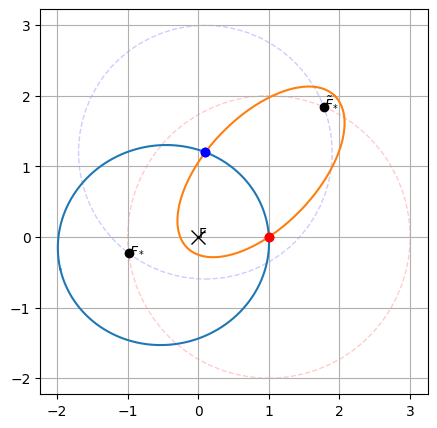

In [3]:
P1 = np.array([1,0,0])
P2 = np.array([0.1,1.2,0])
a = 1.5

r1,r2,ehats,ehatt,es,et,ps,pt,ws,wt = lambert_geometrico(P1,P2,a,plot=True)